In [1]:
#Importación de paquetes
#Importamos pandas
import pandas as pd 
#Importamos numpy
import numpy as np 
#Importamos datetime 
import datetime as dt 

#Importación de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Importamos el archivo de soporte que contiene las funciones
import sys
sys.path.append('../')
from src.soporte import *

print ("Librerias importadas")

Librerias importadas


In [2]:
#Importamos el dataset transformado
df_eda_def = pd.read_csv("../clean_data/data_transformado.csv")
print ("Dataframe importado")

Dataframe importado


In [3]:
#Comprobamos las columnas
df_eda_def.head()

,suscribed,age,job,education,marital,Income,Kidhome,Teenhome
0,no,38,Non-active,Basic education,MARRIED,161770,1,0
1,no,57,Industry,High school,MARRIED,85477,1,1
2,no,37,Industry,High school,MARRIED,147233,1,1
3,no,40,Administration,Basic education,MARRIED,121393,1,2
4,no,56,Industry,High school,MARRIED,63164,1,2


Recordemos el objetivo del EDA: 

***OBJETIVO DEL EDA***

El objetivo que persigue este EDA es obtener el perfil del cliente y su relación con la columna suscripción. Para ello vamos a aislar las columnas que nos sirven del dataframe general y a transformarlas de acuerdo a nuestras necesidades:

In [4]:
#Hacemos un análisis preliminar
df_eda_def.info()

<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   suscribed  43000 non-null  str  
 1   age        43000 non-null  int64
 2   job        43000 non-null  str  
 3   education  43000 non-null  str  
 4   marital    42915 non-null  str  
 5   Income     43000 non-null  int64
 6   Kidhome    43000 non-null  int64
 7   Teenhome   43000 non-null  int64
dtypes: int64(4), str(4)
memory usage: 2.6 MB


Como podemos observar, para poder establecer un perfil de clientes potenciales para esta institución financiera haremos uso de 8 variables. Nuestro estudio girará en comprender estas variables y luego en ver como se relacionan con la columna suscribed. Recordemos que representa cada una de las variables de este dataframe objetivo: 

-   suscribed: Indica si el cliente ha suscrito un producto o servicio (Sí/No).
-	age: La edad del cliente.
-	job: La ocupación o profesión del cliente.
-	marital: El estado civil del cliente.
-	education: El nivel educativo del cliente.
-   Income: Representa el ingreso anual del cliente en términos monetarios.
-   Kidhome: Indica el número de niños en el hogar del cliente.
-   Teenhome: Indica el número de adolescentes en el hogar del cliente.

El objetivo de este EDA como hemos mencionado previamente es establecer el perfil de los clientes que han suscrito el producto. Es por ello por lo que vamos a aislar inicialmente las entradas en el dataframe cuyo valor en la columna suscribed sea "yes" inicialmente. 
A postreriori, para entender que hace que los clientes hayan suscrito algún producto utilizaremos el dataframe general.

**Fase 1 --> Pre-work**

In [5]:
#Ahora empezamos a trabajar y para hacerlo copiamos nuestro dataframe en uno nuevo para trabajar. 
df_perfil = df_eda_def[df_eda_def['suscribed'] == 'yes']
print("Dataframe copiado")

Dataframe copiado


**Fase 2 --> EDA Inicial y análisis de las variables numéricas**

In [6]:
#Separamos las variables en categoricas y numéricas
eda_inicial(df_perfil)

Variables numéricas: 
 Index(['age', 'Income', 'Kidhome', 'Teenhome'], dtype='str')
 
           count        mean         std     min       25%      50%  \
age       4844.0     40.5419     13.0062    17.0     31.00     38.0   
Income    4844.0  92584.3012  50240.0097  5841.0  49538.25  92144.5   
Kidhome   4844.0      1.0052      0.8190     0.0      0.00      1.0   
Teenhome  4844.0      0.9969      0.8186     0.0      0.00      1.0   

                75%       max  
age           47.00      98.0  
Income    134555.75  180791.0  
Kidhome        2.00       2.0  
Teenhome       2.00       2.0  
 
Variables categóricas: 
 Index(['suscribed', 'job', 'education', 'marital'], dtype='str')
 
          count unique             top  freq
suscribed  4844      1             yes  4844
job        4844      5  Administration  2519
education  4844      6      University  1748
marital    4831      3         MARRIED  2655


Como parte del análisis de variables numéricas, vamos a realizar una matriz de correlación de las variables edad e ingresos para ver como afectan estas a la varaible suscribed. Para ello, recuperamos el df original y procedemos: 

A continuación obtenemos la correlación de las variables numéricas con la columna suscribed y cada una de sus posibles respuestas para ello vamos a realizar los siguientes pasos: 

In [7]:
#Copiamos el dataframe original ya que con el que estabamos trabajando solo era para clientes que suscribieron sus productos. 
df_corr = df_eda_def
print('Dataframe copiado')
df_corr.info()

Dataframe copiado
<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   suscribed  43000 non-null  str  
 1   age        43000 non-null  int64
 2   job        43000 non-null  str  
 3   education  43000 non-null  str  
 4   marital    42915 non-null  str  
 5   Income     43000 non-null  int64
 6   Kidhome    43000 non-null  int64
 7   Teenhome   43000 non-null  int64
dtypes: int64(4), str(4)
memory usage: 2.6 MB


In [8]:
#Convertimos la variable suscribed en una variable numérica
df_corr['suscribed_num'] = df_corr['suscribed'].map({'yes': 1, 'no': 0})
df_corr.head()

,suscribed,age,job,education,marital,Income,Kidhome,Teenhome,suscribed_num
0,no,38,Non-active,Basic education,MARRIED,161770,1,0,0
1,no,57,Industry,High school,MARRIED,85477,1,1,0
2,no,37,Industry,High school,MARRIED,147233,1,1,0
3,no,40,Administration,Basic education,MARRIED,121393,1,2,0
4,no,56,Industry,High school,MARRIED,63164,1,2,0


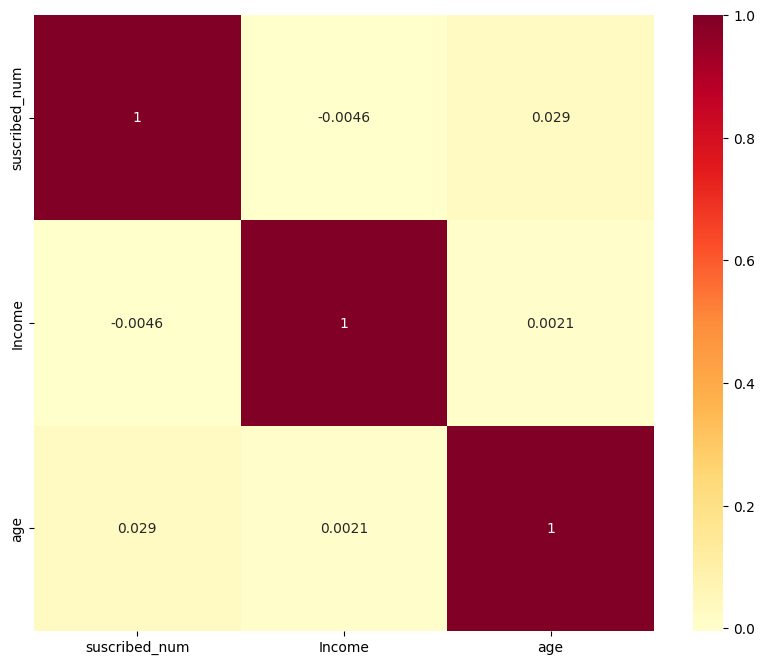

In [9]:
corr_fig (df_corr, ['suscribed_num', 'Income', 'age'])

*Insights sobre las variables numéricas*
- Edad --> El perfil de nuestro cliente no es una persona joven ni extremadamente mayor ya que la edad media del cliente que acabo suscribiendo un producto son unos 40,5 años y la mediana se encuentra en los 38 años lo que nos lleva a pensar que deberíamos lanzar mensajes destinados a un público que se encuentra en etapa de generación de ingresos y acumulación de patrimonio. 
La correlación con la columna edad es positiva pero muy débil lo que indica que tiene muy poca afectación sobre si un cliente suscribe o no el producto.
- Ingresos: El ingreso medio de nuestro cliente es de unos 92500 euros anuales aunque podemos interpretar que hay un sector de los clientes con unos ingresos más sustenciales dado al cuartil 3 en unos 134555 euros y el máximo en unos 180800 euros. Esto nos lleva a intrepretar que el cliente del banco es de capacidad adquisitiva media/alta con un nicho de renta muy alta. 
La correlación con la columna income es positiva pero muy débil lo que indica que tiene muy poca afectación sobre si un cliente suscribe o no el producto.

**Fase 3 --> Análisis de las variables categóricas**

A continuación, procedemos a realizar un análisis de las variables categóricas ya limitadas pero considerando las variables Kidhome y Teenhome como categóricas:

***Variable  job***

VARIABLE: job
 
Número de categorías: 5
 
Distribución de frecuencias
job
Administration    2519
Industry          1001
Non-active         998
Independent        287
Not specified       39
Name: count, dtype: int64
 
Porcentajes
job
Administration    52.00
Industry          20.66
Non-active        20.60
Independent        5.92
Not specified      0.81
Name: proportion, dtype: float64






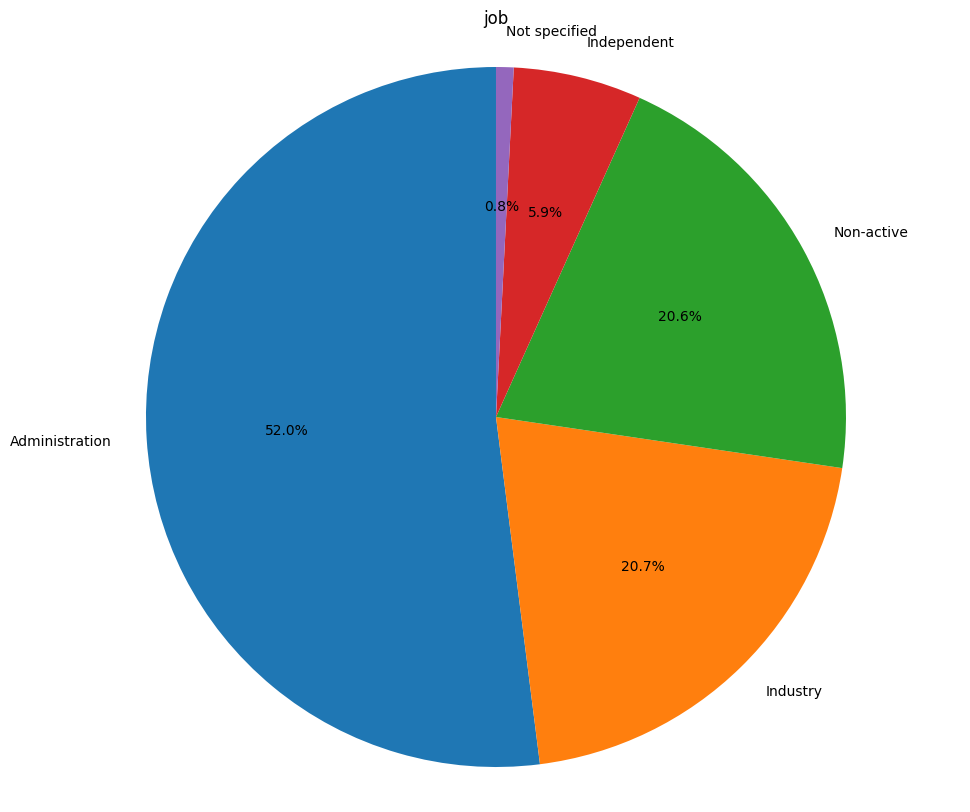

In [10]:
#Analizamos la variable job con una función creada previamente
cat_analysis (df_perfil[['job']])

A continuación procedemos al análisis de la correlación de las categorías en la variable job en relacióna a la columna suscribed:

In [11]:
#Utilizamos la función get_dummies para convertir la columna categórica job en una serie de columnas numéricas para así poder analizar la
#correlación.
df_job = pd.get_dummies(df_corr, columns = ['job'])
df_job.info()


<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   suscribed           43000 non-null  str  
 1   age                 43000 non-null  int64
 2   education           43000 non-null  str  
 3   marital             42915 non-null  str  
 4   Income              43000 non-null  int64
 5   Kidhome             43000 non-null  int64
 6   Teenhome            43000 non-null  int64
 7   suscribed_num       43000 non-null  int64
 8   job_Administration  43000 non-null  bool 
 9   job_Independent     43000 non-null  bool 
 10  job_Industry        43000 non-null  bool 
 11  job_Non-active      43000 non-null  bool 
 12  job_Not specified   43000 non-null  bool 
dtypes: bool(5), int64(5), str(3)
memory usage: 2.8 MB


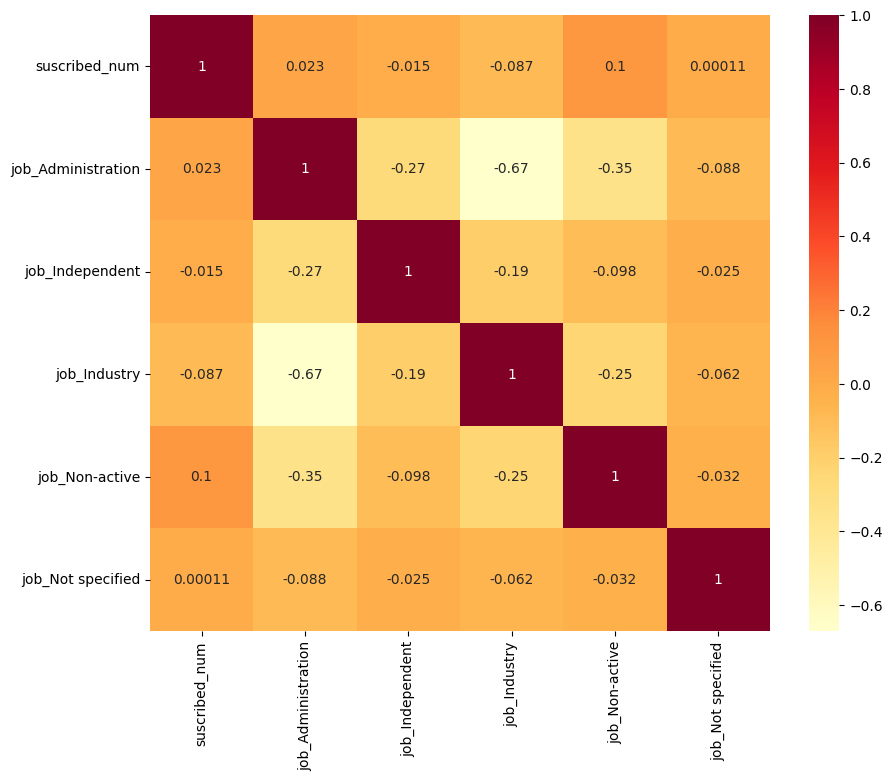

In [ ]:
#Obtenemos un heatmap de la matriz de correlación con una función predefinida
corr_fig(df_job, ['suscribed_num', 'job_Administration', 'job_Independent', 'job_Industry', 'job_Non-active', 'job_Not specified'])

*Insights sobre la variable job*
1. Segmento dominante claro

- Administration (52%)

Este segmento definirá el comportamiento medio de la campaña por lo que cualquier resultado global de futuras campañas estará fuertemente influenciado por este perfil. Este segmento debería de considerarse a futuro para campañas con optimizaciones de creatividades y personalización de mensajes.


2. Segmentos secundarios relevantes (masa crítica)

- Industry = 20.66 %
- Non-active = 20.60 %

Representan 1 de cada 5 cliente por lo que deberían de jugar un papel importante en futuras campañas y/o estar considerados para hacer campañas diferenciadas para estos sectores.

3. Segmento nicho con posible alto valor

- Independent = 5.92 %

Segmento pequeño pero con gran potencial ya que en muchos casos trabajadores de este sector tienen mayor renta y capacidad de decisión financiera, estos serían excelentes candidatos para productos financieros complejos y/o ofertas premium dedicadas solo a ellos. 

*Análisis de correlación*
- Como podemos observar, no hay ninguna correlación destacable ya que son todas o positivas o negativas pero muy débiles. La única correlación destacable aunque débil es la correlación positiva débil entre la población no activa y la gente que suscribió un producto.

***Variable education***

VARIABLE: education
 
Número de categorías: 6
 
Distribución de frecuencias
education
University             1748
Basic education        1135
High school            1076
Professional Course     620
Unknown                 261
Illiterate                4
Name: count, dtype: int64
 
Porcentajes
education
University             36.09
Basic education        23.43
High school            22.21
Professional Course    12.80
Unknown                 5.39
Illiterate              0.08
Name: proportion, dtype: float64






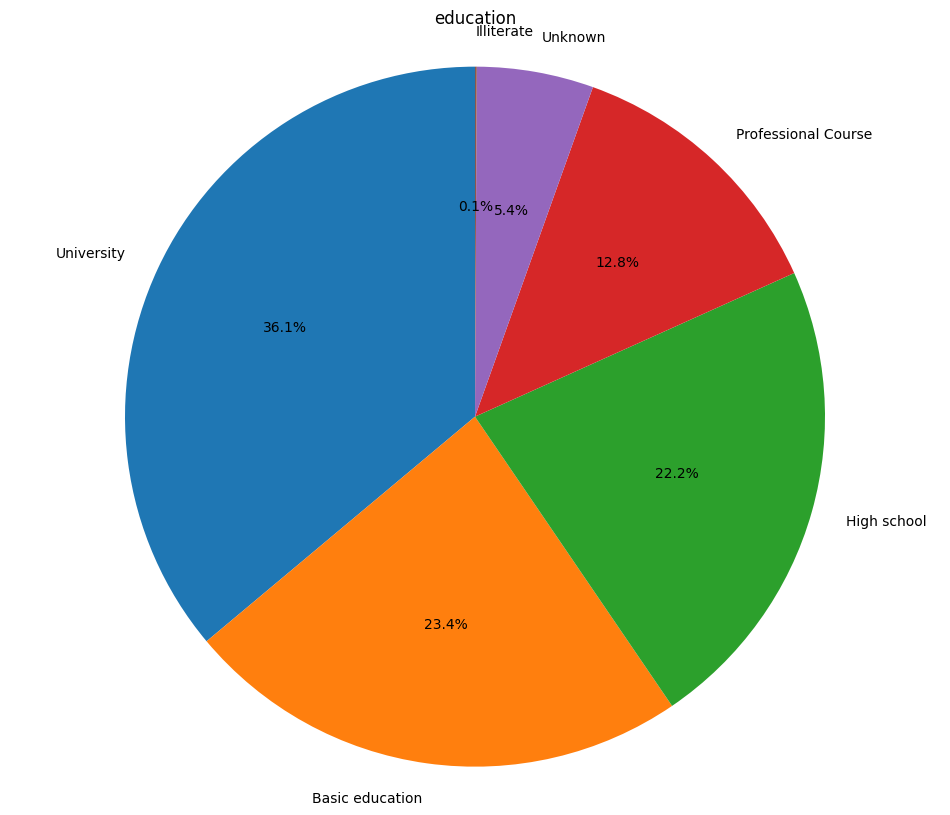

In [13]:
#Analizamos la variable education con una función creada previamente
cat_analysis (df_perfil[['education']])

A continuación procedemos al análisis de la correlación de las categorías en la variable job en relacióna a la columna suscribed:

In [14]:
#Utilizamos la función get_dummies para convertir la columna categórica education en una serie de columnas numéricas para así poder analizar la correlación.
df_job = pd.get_dummies(df_corr, columns = ['education'])
df_job.info()

<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   suscribed                      43000 non-null  str  
 1   age                            43000 non-null  int64
 2   job                            43000 non-null  str  
 3   marital                        42915 non-null  str  
 4   Income                         43000 non-null  int64
 5   Kidhome                        43000 non-null  int64
 6   Teenhome                       43000 non-null  int64
 7   suscribed_num                  43000 non-null  int64
 8   education_Basic education      43000 non-null  bool 
 9   education_High school          43000 non-null  bool 
 10  education_Illiterate           43000 non-null  bool 
 11  education_Professional Course  43000 non-null  bool 
 12  education_University           43000 non-null  bool 
 13  education_Unknown          

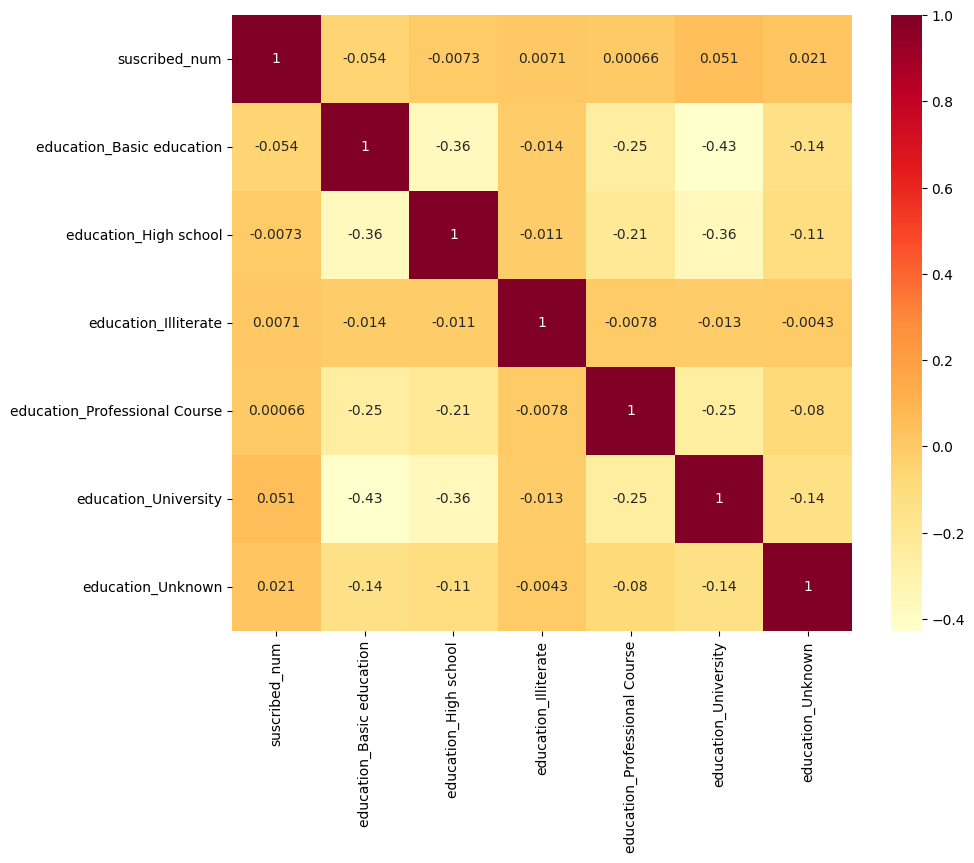

In [18]:
#Obtenemos un heatmap de la matriz de correlación con una función predefinida
corr_fig(df_job, ['suscribed_num', 'education_Basic education', 'education_High school', 'education_Illiterate', 'education_Professional Course', 'education_University', 'education_Unknown'])

*Insights sobre la variable education*
1. Segmento mayoritario:

- Clientes con estudios universitarios (36%)

Son buenos candidatos para ofrecer productos más complejos con comunicaciones más técnicas. A diferencia del caso anterior este es un segmento dominante pero no con tanta dominancia como en el caso de job por lo que individualizar las campañas de marketing quizá no es una buena opción pese a que este grupo tenga un gran peso en el resultado de la campaña. 

2. Segmentos secundatrios relevantes

- Basic education = 23.43 %
- High school = 22.21 %

Este grupo en conjunto representa más del 45% de los clientes que suscribieron un producto por lo que teniendo en cuenta esta información, los mensajes dirigidos a estos grupos en futuras campañas deberían ser claros, directos y sin tecnicismos financieros, priorizando mensajes fáciles de entender que destaquen el precio, los beneficios inmediatos y la seguridad del producto, lo que implica la necesidad de adaptar el contenido y el tono según el nivel educativo para maximizar la efectividad de la campaña.

3. Segmento nicho con posible valor 

Professional Course = 12.80 %

Este segmento representa casi el 13% de los clientes, y representan un nicho en el que puede haber crecimeinto de clientes con la estrategia de marketing justa. Este segmento compuesto probablemente por profesionales técnicos y con ingresos relativamente estables, puede responder especialmente bien a propuestas de valor basadas en productos prácticos, beneficios tangibles y mensajes centrados en la eficiencia y la utilidad directa, más que en conceptos abstractos o emocionales.


*Análisis de correlación* 

En este caso, tampoco hay nada destacable en cuanto a las correlaciones entre la columna suscribed y las categorias de la columna education.

***Variable marital***

VARIABLE: marital
 
Número de categorías: 3
 
Distribución de frecuencias
marital
MARRIED     2655
SINGLE      1686
DIVORCED     490
Name: count, dtype: int64
 
Porcentajes
marital
MARRIED     54.96
SINGLE      34.90
DIVORCED    10.14
Name: proportion, dtype: float64






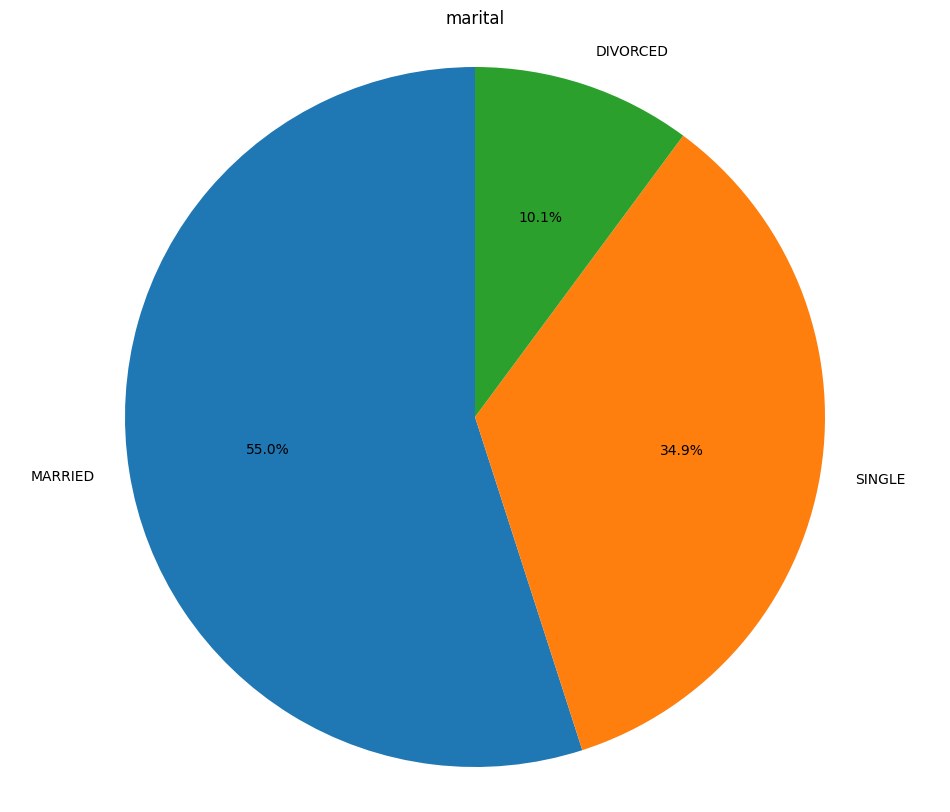

In [15]:
#Analizamos la variable marital con una función creada previamente
cat_analysis (df_perfil[['marital']])

A continuación procedemos al análisis de la correlación de las categorías en la variable marital en relacióna a la columna suscribed:

In [19]:
#Utilizamos la función get_dummies para convertir la columna categórica marital en una serie de columnas numéricas para así poder analizar la correlación.
df_job = pd.get_dummies(df_corr, columns = ['marital'])
df_job.info()

<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   suscribed         43000 non-null  str  
 1   age               43000 non-null  int64
 2   job               43000 non-null  str  
 3   education         43000 non-null  str  
 4   Income            43000 non-null  int64
 5   Kidhome           43000 non-null  int64
 6   Teenhome          43000 non-null  int64
 7   suscribed_num     43000 non-null  int64
 8   marital_DIVORCED  43000 non-null  bool 
 9   marital_MARRIED   43000 non-null  bool 
 10  marital_SINGLE    43000 non-null  bool 
dtypes: bool(3), int64(5), str(3)
memory usage: 2.7 MB


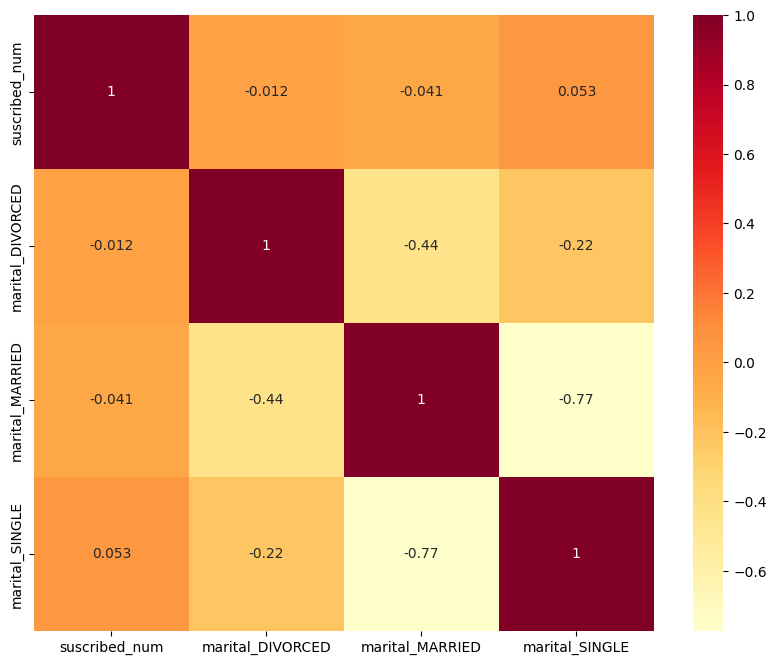

In [20]:
#Obtenemos un heatmap de la matriz de correlación con una función predefinida
corr_fig(df_job, ['suscribed_num', 'marital_DIVORCED', 'marital_MARRIED', 'marital_SINGLE'])

*Insights sobre la variable marital*
1. Segmento dominante:

- Married = 54.96 %

Este segmento representa más de la mitad de la población analizada en el dataframe. Los componentes de este segmento probablemente presentan mayor estabilidad financiera, toma decisiones orientadas al hogar y una mayor preocupación por la planificación a largo plazo, lo que lo convierte en un buen target para productos de ahorro, inversión conservadora, seguros y soluciones de planificación familiar.
Además, teniendo en cuenta el impacto que tiene sobre la variable la población casada es posible que dependiendo del trato ofrecido a dicha población condicione el resultado global de la campaña. 

2. Segmento secundario relevante:

- Single = 34.90 %

1 de cada 3 implicados en la campaña de marketing que han acabado suscribiendo productos está soltero. Este segmento está representado por una mayor flexibilidad financiera orientada hacía el consumo y una menor carga familiar. Esto, los hace el segmento adecuado para ofertar productos líquidos y/o ofertas digitales con mensajes más dinámicos. 
Considerando el impacto que puede tener sobre el resultado final de una campaña de marketing, este grupo tiene la suficiente incisión como para considerar campañas diferenciadas hacía ellos. 

3. Segmento minoritario pero con posible comportamiento específico

- Divorced = 10.14 %

Este segmento aunque representa una minoría de los encuestados que acabaron suscribiendo un producto, podría mostrar patrones de respuesta distintos a las campañas de marketing que quizá convendría analizar. 

*Análisis de correlación* 

En este caso tampoco hay nada destacable en relación a la correlación entre categorías con la columna suscribed.

***Variable Kidhome***

VARIABLE: Kidhome
 
Número de categorías: 3
 
Distribución de frecuencias
Kidhome
2    1637
0    1612
1    1595
Name: count, dtype: int64
 
Porcentajes
Kidhome
2    33.79
0    33.28
1    32.93
Name: proportion, dtype: float64






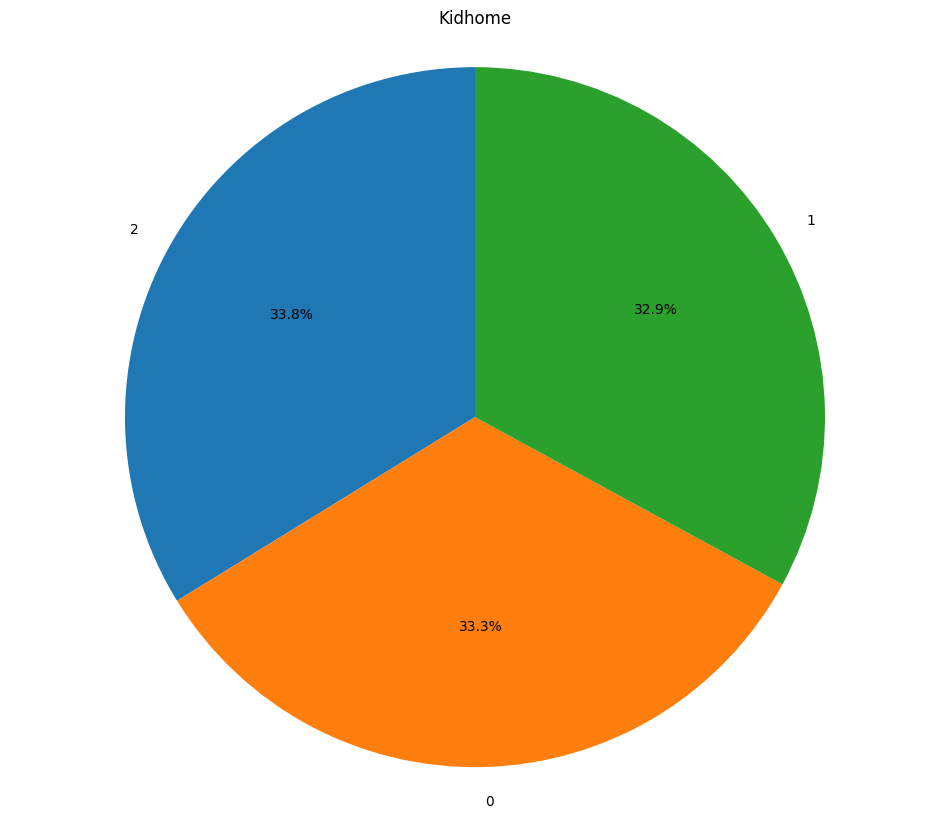

In [16]:
#Analizamos la variable Kidhome con una función creada previamente
cat_analysis (df_perfil[['Kidhome']])

A continuación, procedemos al análisis de la correlación de las categorías en la variable Kidhome en relacióna a la columna suscribed:

In [21]:
#Utilizamos la función get_dummies para convertir la columna categórica Kidhome en una serie de columnas numéricas para así poder analizar la correlación.
df_job = pd.get_dummies(df_corr, columns = ['Kidhome'])
df_job.info()

<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   suscribed      43000 non-null  str  
 1   age            43000 non-null  int64
 2   job            43000 non-null  str  
 3   education      43000 non-null  str  
 4   marital        42915 non-null  str  
 5   Income         43000 non-null  int64
 6   Teenhome       43000 non-null  int64
 7   suscribed_num  43000 non-null  int64
 8   Kidhome_0      43000 non-null  bool 
 9   Kidhome_1      43000 non-null  bool 
 10  Kidhome_2      43000 non-null  bool 
dtypes: bool(3), int64(4), str(4)
memory usage: 2.7 MB


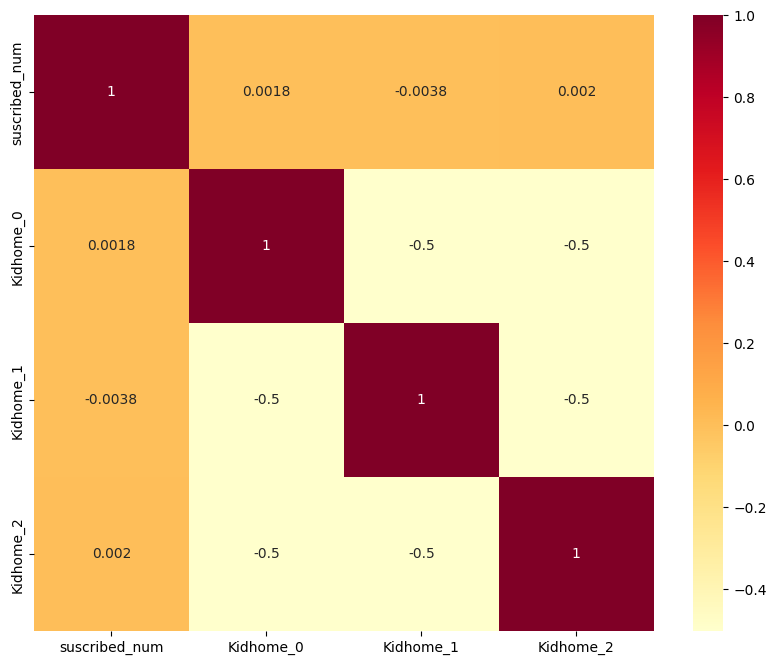

In [23]:
#Obtenemos un heatmap de la matriz de correlación con una función predefinida
corr_fig(df_job, ['suscribed_num', 'Kidhome_0', 'Kidhome_1', 'Kidhome_2'])

***Insights de la variable Kidhome***

1. Variable con una distribución extremadamente equilibrada: 

- 1 Hijo (32.9%)
- 2 Hijos o más (33.8%)
- 0 Hijos (33.3%)

Al no existir un segmento dominante y tener un reparto tan equilibrado en la variable esta presenta un alto poder de segmentación lo que la hace una variable ideal a considerar para personalizar campañas según la carga familiar.

*Análisis de correlación*

En este caso tampoco hay nada destacable en la variable que representa los hijos en casa.

***Variable Teenhome***

VARIABLE: Teenhome
 
Número de categorías: 3
 
Distribución de frecuencias
Teenhome
0    1630
2    1615
1    1599
Name: count, dtype: int64
 
Porcentajes
Teenhome
0    33.65
2    33.34
1    33.01
Name: proportion, dtype: float64






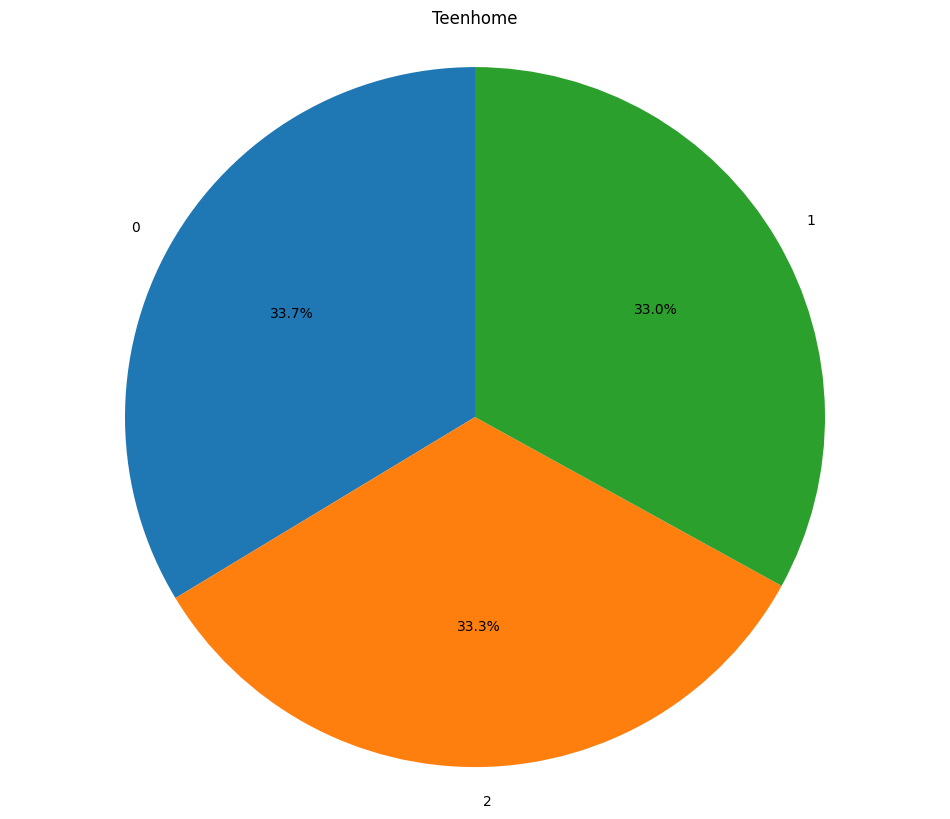

In [17]:
#Analizamos la variable Kidhome con una función creada previamente
cat_analysis (df_perfil[['Teenhome']])

A continuación, procedemos al análisis de la correlación de las categorías en la variable Teenhome en relacióna a la columna suscribed:

In [24]:
#Utilizamos la función get_dummies para convertir la columna categórica Teenhome en una serie de columnas numéricas para así poder analizar la correlación.
df_job = pd.get_dummies(df_corr, columns = ['Teenhome'])
df_job.info()

<class 'pandas.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   suscribed      43000 non-null  str  
 1   age            43000 non-null  int64
 2   job            43000 non-null  str  
 3   education      43000 non-null  str  
 4   marital        42915 non-null  str  
 5   Income         43000 non-null  int64
 6   Kidhome        43000 non-null  int64
 7   suscribed_num  43000 non-null  int64
 8   Teenhome_0     43000 non-null  bool 
 9   Teenhome_1     43000 non-null  bool 
 10  Teenhome_2     43000 non-null  bool 
dtypes: bool(3), int64(4), str(4)
memory usage: 2.7 MB


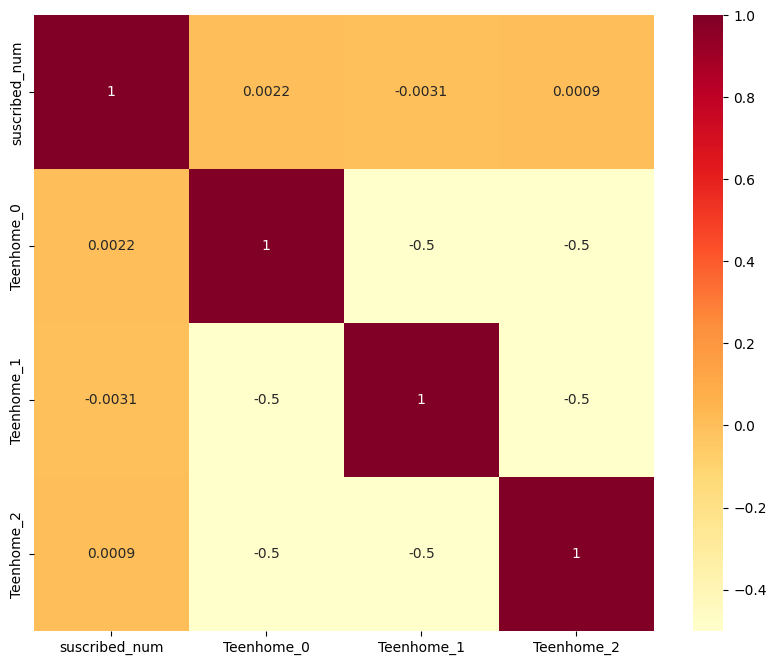

In [25]:
#Obtenemos un heatmap de la matriz de correlación con una función predefinida
corr_fig(df_job, ['suscribed_num', 'Teenhome_0', 'Teenhome_1', 'Teenhome_2'])

Al tener una distribución igual que en el caso anterior podemos aplicar los mismos insights que con la variable anterior.

*Análisis de correlación*

En este caso tampoco hay nada destacable en la variable que representa los adolescentes en casa.

**Perfil del cliente**

- Edad: En torno a unos 40 años o algo más joven. 
- Ingresos: Ingreso medio/alto 
- Estado civil: Casado/a
- Educación: Educación superior (estudios universitarios)
- Empleo: Empleado en puestos de administración y gestión
